# **Modeling Autoregression The AR model**

In statistics, econometrics and signal processing, an autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation (or recurrence relation which should not be confused with differential equation). Together with the moving-average (MA) model, it is a special case and key component of the more general autoregressive–moving-average (ARMA) and autoregressive integrated moving average (ARIMA) models of time series, which have a more complicated stochastic structure; it is also a special case of the vector autoregressive model (VAR), which consists of a system of more than one interlocking stochastic difference equation in more than one evolving random variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pylab
import scipy.stats as st
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

%matplotlib inline

data = pd.read_csv("data/IndexE8.csv")
data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [2]:
data['date'] = pd.to_datetime(data.date, dayfirst=True)
data.set_index('date', inplace=True)
data.index.name = None
data = data.asfreq('b').fillna(method='ffill')

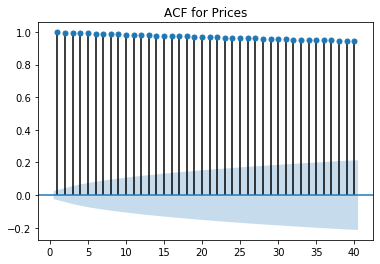

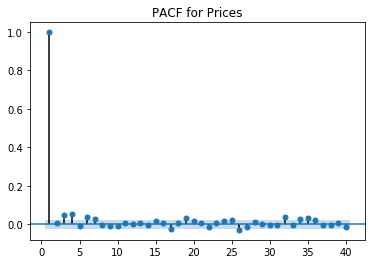

In [3]:
sgt.plot_acf(data.ftse, zero=False, lags=40)
plt.title('ACF for Prices');

sgt.plot_pacf(data.ftse, zero=False, lags=40, method=('ols'))
plt.title('PACF for Prices');

## **The AR(1) Model**

In [4]:
model_ar = ARMA(data.ftse, order=(1, 0))
result_ar = model_ar.fit()
print(result_ar.summary())

                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -34438.032
Method:                       css-mle   S.D. of innovations             58.378
Date:                Sun, 10 May 2020   AIC                          68882.064
Time:                        13:23:19   BIC                          68902.298
Sample:                    01-07-1994   HQIC                         68889.075
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5691.2261    742.304      7.667      0.000    4236.337    7146.115
ar.L1.ftse     0.9991      0.001   1630.897      0.000       0.998       1.000
                                    Roots           

## **Higher-Lag AR Model**

In [5]:
model_ar_2 = ARMA(data.ftse, order=(2, 0))
result_ar_2 = model_ar_2.fit()
print(result_ar_2.summary())

                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.741
Method:                       css-mle   S.D. of innovations             58.376
Date:                Sun, 10 May 2020   AIC                          68883.483
Time:                        13:23:20   BIC                          68910.462
Sample:                    01-07-1994   HQIC                         68892.830
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6805    667.086      8.130      0.000    4116.215    6731.146
ar.L1.ftse     0.9905      0.013     78.749      0.000       0.966       1.015
ar.L2.ftse     0.0086      0.013      0.683      0.4

## **Log-Likelihood Ratio (LLR) test**

In statistics, the likelihood-ratio test assesses the goodness of fit of two competing statistical models based on the ratio of their likelihoods, specifically one found by maximization over the entire parameter space and another found after imposing some constraint. If the constraint (i.e., the null hypothesis) is supported by the observed data, the two likelihoods should not differ by more than sampling error. Thus the likelihood-ratio test tests whether this ratio is significantly different from one, or equivalently whether its natural logarithm is significantly different from zero.

In [6]:
def llr_test(model_1, model_2, DF=1):
    l1 = model_1.fit().llf
    l2 = model_2.fit().llf
    lr = 2 * (l2 - l1)
    p = chi2.sf(lr, DF)
    return p

In [7]:
llr_test(model_ar, model_ar_2)

0.44589041157411424

Fitting a more complicated model and checking if it gives us distinguishably greater Log-Likelihoods.

In [8]:
model_ar_2 = ARMA(data.ftse, order=(2, 0))
result_ar_2 = model_ar_2.fit()

model_ar_3 = ARMA(data.ftse, order=(3, 0))
result_ar_3 = model_ar_3.fit()

In [9]:
model_ar_4 = ARMA(data.ftse, order=(4, 0))
result_ar_4 = model_ar_4.fit()

print(result_ar_4.summary())
print(f'LLR test: {llr_test(model_ar_3, model_ar_4)}')

                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.635
Method:                       css-mle   S.D. of innovations             58.226
Date:                Sun, 10 May 2020   AIC                          68855.270
Time:                        13:23:22   BIC                          68895.738
Sample:                    01-07-1994   HQIC                         68869.291
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6803    757.500      7.160      0.000    3939.008    6908.353
ar.L1.ftse     0.9875      0.013     78.870      0.000       0.963       1.012
ar.L2.ftse    -0.0360      0.018     -2.037      0.0

In [10]:
model_ar_5 = ARMA(data.ftse, order=(5, 0))
result_ar_5 = model_ar_5.fit()

print(result_ar_5.summary())
print(f'LLR test: {llr_test(model_ar_4, model_ar_5)}')

                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -34421.343
Method:                       css-mle   S.D. of innovations             58.223
Date:                Sun, 10 May 2020   AIC                          68856.685
Time:                        13:23:25   BIC                          68903.898
Sample:                    01-07-1994   HQIC                         68873.044
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6803    748.114      7.250      0.000    3957.404    6889.956
ar.L1.ftse     0.9880      0.013     78.770      0.000       0.963       1.013
ar.L2.ftse    -0.0361      0.018     -2.040      0.0

In [11]:
print(f'LLR test: {llr_test(model_ar, model_ar_5, DF=4)}')

LLR test: 9.991840334105627e-07


In [12]:
model_ar_6 = ARMA(data.ftse, order=(6, 0))
result_ar_6 = model_ar_6.fit()

print(result_ar_5.summary())
print(f'LLR test: {llr_test(model_ar_5, model_ar_6)}')

                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -34421.343
Method:                       css-mle   S.D. of innovations             58.223
Date:                Sun, 10 May 2020   AIC                          68856.685
Time:                        13:23:32   BIC                          68903.898
Sample:                    01-07-1994   HQIC                         68873.044
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6803    748.114      7.250      0.000    3957.404    6889.956
ar.L1.ftse     0.9880      0.013     78.770      0.000       0.963       1.013
ar.L2.ftse    -0.0361      0.018     -2.040      0.0

In [13]:
model_ar_7 = ARMA(data.ftse, order=(7, 0))
result_ar_7 = model_ar_7.fit()

print(result_ar_5.summary())
print(f'LLR test: {llr_test(model_ar_6, model_ar_7)}')

                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -34421.343
Method:                       css-mle   S.D. of innovations             58.223
Date:                Sun, 10 May 2020   AIC                          68856.685
Time:                        13:23:37   BIC                          68903.898
Sample:                    01-07-1994   HQIC                         68873.044
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6803    748.114      7.250      0.000    3957.404    6889.956
ar.L1.ftse     0.9880      0.013     78.770      0.000       0.963       1.013
ar.L2.ftse    -0.0361      0.018     -2.040      0.0

In [14]:
model_ar_8 = ARMA(data.ftse, order=(8, 0))
result_ar_8 = model_ar_8.fit()

print(result_ar_5.summary())
print(f'LLR test: {llr_test(model_ar_7, model_ar_8)}')

                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -34421.343
Method:                       css-mle   S.D. of innovations             58.223
Date:                Sun, 10 May 2020   AIC                          68856.685
Time:                        13:23:44   BIC                          68903.898
Sample:                    01-07-1994   HQIC                         68873.044
                         - 01-29-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6803    748.114      7.250      0.000    3957.404    6889.956
ar.L1.ftse     0.9880      0.013     78.770      0.000       0.963       1.013
ar.L2.ftse    -0.0361      0.018     -2.040      0.0

In [15]:
print(sts.adfuller(data.ftse))

(-1.597778892117989, 0.48470912054659465, 6, 6270, {'1%': -3.4313933778649943, '5%': -2.862001080749219, '10%': -2.567015430304048}, 68476.87620974617)


## **Using Returns**

In [16]:
data['returns'] = data.ftse.pct_change(1) * 100
data.dropna(inplace=True)
data.head()

,spx,dax,ftse,nikkei,returns
1994-01-10,475.27,2225.00,3440.58,18443.44,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,-0.356166
1994-01-14,474.91,2151.05,3400.56,18973.70,1.206842


Text(0.5, 1.0, 'Returns')

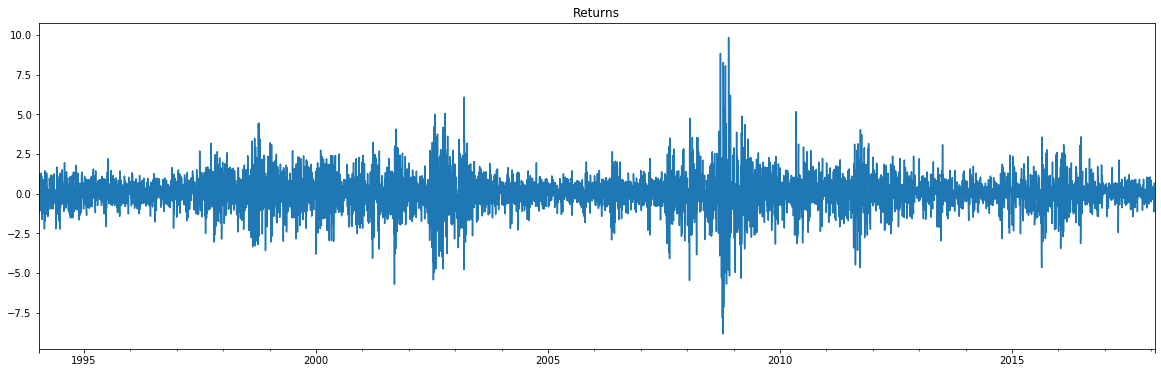

In [17]:
data.returns.plot(figsize=(20, 6))
plt.title('Returns')

In [18]:
print(sts.adfuller(data.returns))

(-15.140761332034824, 7.016338451093601e-28, 34, 6241, {'1%': -3.431398228116075, '5%': -2.8620032237533897, '10%': -2.5670165710764503}, 19026.504469066465)


## **ACF and PACF for returns**

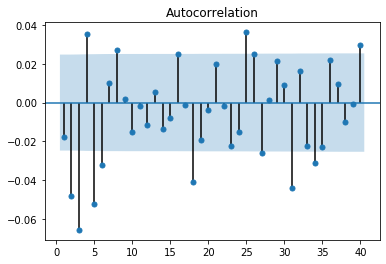

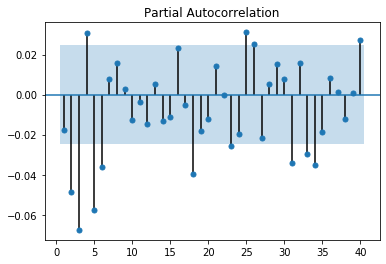

In [19]:
sgt.plot_acf(data.returns, zero=False, lags=40);
sgt.plot_pacf(data.returns, zero=False, lags=40, method=('ols'));

## **AR(1) for Returns**

In [20]:
model_ar_ret_1 = ARMA(data.returns, order=(1, 0))
result_ar_ret_1 = model_ar_ret_1.fit()
print(result_ar_ret_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood               -9597.705
Method:                       css-mle   S.D. of innovations              1.117
Date:                Sun, 10 May 2020   AIC                          19201.409
Time:                        13:23:52   BIC                          19221.643
Sample:                    01-10-1994   HQIC                         19208.420
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.371      0.170      -0.008       0.046
ar.L1.returns    -0.0176      0.013     -1.394      0.163      -0.042       0.007
                                    Root

## **Fitting Higher-lag AR Model for Returns**

In [21]:
model_ar_ret_2 = ARMA(data.returns, order=(2, 0))
result_ar_ret_2 = model_ar_ret_2.fit()

In [22]:
model_ar_ret_3 = ARMA(data.returns, order=(3, 0))
result_ar_ret_3 = model_ar_ret_3.fit()

print(result_ar_ret_3.summary())
print(f'LLR test: {llr_test(model_ar_ret_2, model_ar_ret_3)}')

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood               -9575.951
Method:                       css-mle   S.D. of innovations              1.113
Date:                Sun, 10 May 2020   AIC                          19161.902
Time:                        13:23:52   BIC                          19195.624
Sample:                    01-10-1994   HQIC                         19173.586
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.542      0.123      -0.005       0.043
ar.L1.returns    -0.0217      0.013     -1.725      0.084      -0.046       0.003
ar.L2.returns    -0.0498      0.013     

In [23]:
model_ar_ret_4 = ARMA(data.returns, order=(4, 0))
result_ar_ret_4 = model_ar_ret_4.fit()

print(result_ar_ret_4.summary())
print(f'LLR test: {llr_test(model_ar_ret_3, model_ar_ret_4)}')

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(4, 0)   Log Likelihood               -9573.016
Method:                       css-mle   S.D. of innovations              1.112
Date:                Sun, 10 May 2020   AIC                          19158.032
Time:                        13:23:53   BIC                          19198.499
Sample:                    01-10-1994   HQIC                         19172.053
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.494      0.135      -0.006       0.044
ar.L1.returns    -0.0197      0.013     -1.558      0.119      -0.044       0.005
ar.L2.returns    -0.0482      0.013     

In [24]:
model_ar_ret_5 = ARMA(data.returns, order=(5, 0))
result_ar_ret_5 = model_ar_ret_5.fit()

print(result_ar_ret_5.summary())
print(f'LLR test: {llr_test(model_ar_ret_4, model_ar_ret_5, DF=2)}')

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(5, 0)   Log Likelihood               -9562.542
Method:                       css-mle   S.D. of innovations              1.110
Date:                Sun, 10 May 2020   AIC                          19139.083
Time:                        13:23:54   BIC                          19186.295
Sample:                    01-10-1994   HQIC                         19155.441
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.584      0.113      -0.005       0.043
ar.L1.returns    -0.0179      0.013     -1.420      0.156      -0.043       0.007
ar.L2.returns    -0.0521      0.013     

In [25]:
model_ar_ret_6 = ARMA(data.returns, order=(6, 0))
result_ar_ret_6 = model_ar_ret_6.fit()

print(result_ar_ret_6.summary())
print(f'LLR test: {llr_test(model_ar_ret_5, model_ar_ret_6)}')

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(6, 0)   Log Likelihood               -9558.464
Method:                       css-mle   S.D. of innovations              1.110
Date:                Sun, 10 May 2020   AIC                          19132.928
Time:                        13:23:55   BIC                          19186.884
Sample:                    01-10-1994   HQIC                         19151.623
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.643      0.100      -0.004       0.042
ar.L1.returns    -0.0200      0.013     -1.583      0.113      -0.045       0.005
ar.L2.returns    -0.0510      0.013     

## **Normalizing Values**

In [26]:
benchmark = data.ftse.iloc[0]
data['norm'] = data.ftse / benchmark * 100
data.norm.describe()

count    6276.000000
mean      157.647692
std        33.291942
min        83.607996
25%       130.431279
50%       164.608147
75%       183.245053
max       226.085070
Name: norm, dtype: float64

In [27]:
print(sts.adfuller(data.norm))

(-1.58709969320409, 0.4900704664018014, 6, 6269, {'1%': -3.4313935443677157, '5%': -2.8620011543157835, '10%': -2.5670154694652805}, 24302.76353860927)


## **Normalizing Returns Values**

In [28]:
benchmark = data.returns.iloc[0]
data['returns_norm'] = data.returns / benchmark * 100
data.returns_norm.describe()

count    6276.000000
mean      -12.119922
std       712.750603
min     -6278.557121
25%      -366.035986
50%        -5.001695
75%       325.845998
max      5647.115310
Name: returns_norm, dtype: float64

In [29]:
print(sts.adfuller(data.returns_norm))

(-15.140761332034808, 7.016338451093902e-28, 34, 6241, {'1%': -3.431398228116075, '5%': -2.8620032237533897, '10%': -2.5670165710764503}, 99642.30855107102)


In [30]:
model_norm_ret_1 = ARMA(data.returns_norm, order=(1, 0))
result_norm_ret_1 = model_norm_ret_1.fit()
print(result_norm_ret_1.summary())

                              ARMA Model Results                              
Dep. Variable:           returns_norm   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood              -50131.657
Method:                       css-mle   S.D. of innovations            712.583
Date:                Sun, 10 May 2020   AIC                         100269.313
Time:                        13:23:58   BIC                         100289.546
Sample:                    01-10-1994   HQIC                        100276.324
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1199      8.839     -1.371      0.170     -29.445       5.205
ar.L1.returns_norm    -0.0176      0.013     -1.394      0.163      -0.042       0.007
                    

In [31]:
print(result_ar_ret_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood               -9597.705
Method:                       css-mle   S.D. of innovations              1.117
Date:                Sun, 10 May 2020   AIC                          19201.409
Time:                        13:23:58   BIC                          19221.643
Sample:                    01-10-1994   HQIC                         19208.420
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.371      0.170      -0.008       0.046
ar.L1.returns    -0.0176      0.013     -1.394      0.163      -0.042       0.007
                                    Root

Normalization affects the const and not the ar.L1 values

## **Analyzing The Residuals of Prices**

In [32]:
data['res_prices'] = result_ar_7.resid

print(f"Residual mean: {data.res_prices.mean():.3f}")
print(f"Residual variance: {data.res_prices.var():.3f}")
print(f"Dickey-Fuller Test:\n{sts.adfuller(data.res_prices)}")

Residual mean: 0.793
Residual variance: 3381.514
Dickey-Fuller Test:
(-79.21854746233437, 0.0, 0, 6275, {'1%': -3.431392546147741, '5%': -2.8620007132681926, '10%': -2.567015234685164}, 68455.18172880827)


Text(0.5, 1.0, 'ACF of Residual For Prices')

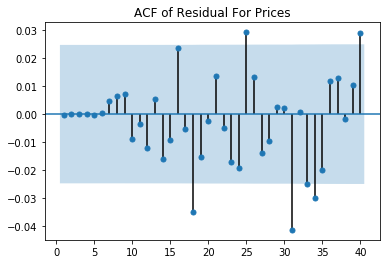

In [33]:
sgt.plot_acf(data.res_prices, zero=False, lags=40)
plt.title('ACF of Residual For Prices')

Text(0.5, 1.0, 'Residuals Of Prices')

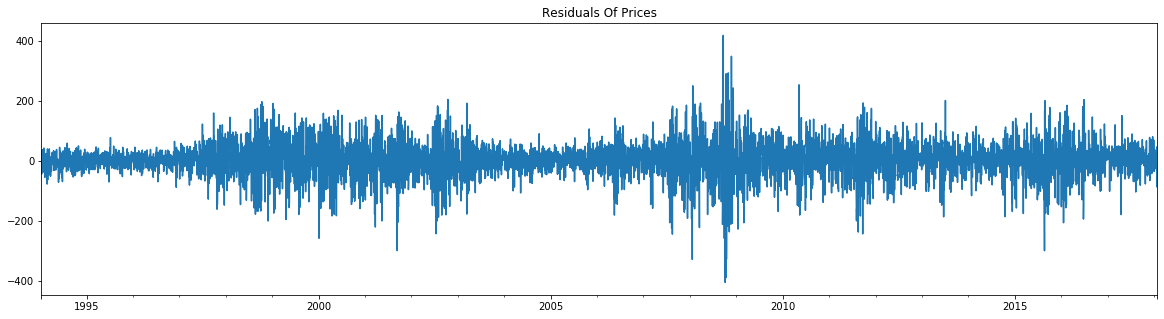

In [34]:
data.res_prices[1:].plot(figsize=(20, 5))
plt.title('Residuals Of Prices')

## **Analyzing The Residuals of Returns**

In [35]:
data['res_returns'] = result_ar_ret_6.resid

print(f"Residual mean: {data.res_returns.mean():.3f}")
print(f"Residual variance: {data.res_returns.var():.3f}")
print(f"Dickey-Fuller Test:\n{sts.adfuller(data.res_returns)}")

Residual mean: -0.000
Residual variance: 1.232
Dickey-Fuller Test:
(-14.994309239545501, 1.1135033187699319e-27, 34, 6241, {'1%': -3.431398228116075, '5%': -2.8620032237533897, '10%': -2.5670165710764503}, 19028.24569035406)


Text(0.5, 1.0, 'ACF of Residual For Returns')

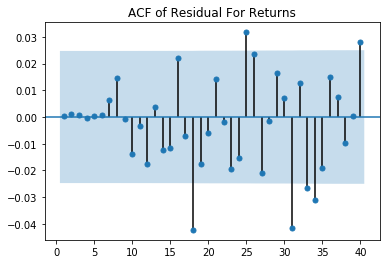

In [36]:
sgt.plot_acf(data.res_returns, zero=False, lags=40)
plt.title('ACF of Residual For Returns')

Text(0.5, 1.0, 'Residuals Of Returns')

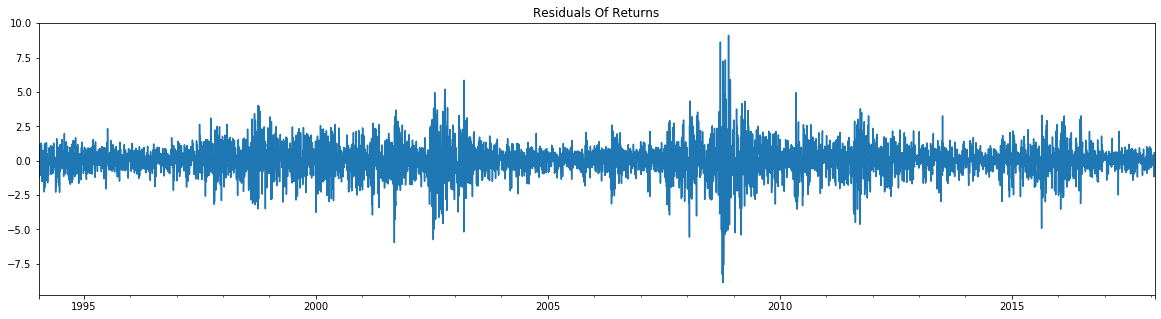

In [37]:
data.res_returns[1:].plot(figsize=(20, 5))
plt.title('Residuals Of Returns')